
_________________
<h1 align="center"><span style='font-family:Georgia'> PRODUCT RATING PREDICTION </span></h1>

_________________

### **Date**:  18-03-2023

### **Problem Statement:**
The rise in e-commerce has brought a significant increase in the importance of customer reviews. There are hundreds of online review sites and massive reviews for every product. 

When you have a new product to be put on wish.com, you can estimate how likely people will like your product, without actually listing out there. It also allows us to understand what conditions will make a product highly rated on wish.com, as a way of understanding their customer base.

### **Notebook Description**:  
This notebook is intended to predict the product ratings given the other features known for a product on `Wish.com`. Ratings are in categories from 1 to 5. For one product, the higher the rating is, the more the customers like the product. 

### **Dataset Description:**

### **Workflow:**
I will create a graph here
### **Deliverable:**
 A python notebook containing the documentation of the final design as well as the answers to the questions.





_________________


<h1 align="center"><span style='font-family:Georgia'>TABLE OF CONTENTS </span></h1>

_________________

* [Setup](#0.0)
  - [Import Dependencies](0.0)
* [Load Dataset](#1.0)
  - [Dataset Overview](#1.1) 
* [Data Cleaning](#2.0)
  - [Removing Duplicates ](#2.1)
  - [Handle Missing Values](#2.2)
  - [Remove Irrelevant Data](#2.2)
  - [Convert Data Type](#2.3)
  - [Handling Outliers](#2.4)
* [Exploratory Data Analysis (EDA)](#3.0)
* [Feature Engineering](#4.0)   
* [Data Modeling](#5.0)
    - [Splitting dataset to train and test sets](#5.1)
* [Conclusion wih visualization](#6.0)

_________________
<h1 align="center"><span style='font-family:Georgia'>  SETUP</span></h1>

_________________

In [1]:
import numpy as np 
import pandas as pd
pd.set_option('display.max_columns', 100)

######################## for creating graphs ################
import plotly.express as px
import seaborn as sns
import matplotlib as mt
import matplotlib.pyplot as plt

# %pylab inline
# plt.rc('figure', figsize=(12,9))
# colors = sns.color_palette()
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
  
# using the style for the plot
# plt.style.use('fivethirtyeight')

######################## for modeling ########################
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [2]:
# from bokeh.io import output_notebook 
# output_notebook()

_________________
<h1 align="center"><span style='font-family:Georgia'> Load Dataset </span></h1>

_________________

In [3]:
data = pd.read_csv('train_new.csv')
data.head()

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id
0,8.00,7,EUR,10000,1,4.0,1670,0,0,0,0,"Summer,soildcolor,Plus Size,Tank,camisole,Tops...",yellow,M,50,Livraison standard,3,0,30,50,NaN,NaN,CN,keepahorse,keepahorse,"88 % avis positifs (66,644 notes)",66644,4.137582,577fb2b368116418674befd9,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08,272
1,8.00,7,EUR,1000,0,4.0,843,1,1,0,0,"bathing suit,Plus Size,bikini set,sexy swimsui...",black,L,50,Livraison standard,3,0,37,50,NaN,NaN,CN,shanghaimingqidianqikejiyouxiangongsi,上海铭启电气科技有限公司,"91 % avis positifs (25,752 notes)",25752,4.256873,566a3ef17233ff2686443082,0,NaN,summer,2020-08,1515
2,6.00,34,EUR,100,0,4.0,10,0,0,0,0,"Summer,Vest,momshirt,Get,summer t-shirts,funny...",white,L,50,Livraison standard,2,0,41,50,NaN,NaN,CN,zhaodongmei,zhaodongmei,"83 % avis positifs (3,897 notes)",3897,3.928920,5aacd6c1ccf0c83e5a6f3de0,0,NaN,summer,2020-08,940
3,4.67,4,EUR,100,1,3.0,82,0,0,0,0,"Summer,Shorts,pants,Beach,Plus Size,beachpant,...",lakeblue,XS,5,Livraison standard,1,0,25,50,NaN,NaN,CN,pookie0331,pookie0331,"87 % avis positifs (7,497 notes)",7497,4.079365,583141fbfef4094e51453d9b,0,NaN,summer,2020-08,309
4,8.00,11,EUR,1000,0,4.0,127,0,0,0,0,"Summer,Floral print,women dresses,fashion dres...",apricot,S,50,Livraison standard,3,0,15,50,1.0,Quantité limitée !,CN,shitongyi12683626,shitongyi12683626,91 % avis positifs (173 notes),173,4.306358,5d3bc9f8e13a7e654424a4cb,0,NaN,summer,2020-08,226


## **1.1 Dataset Overview**

**Information about the attributes**

In [4]:
# data.info()

In [5]:
# data.describe()

**Data shape (Number of variable and observation)**

In [6]:
data.shape

(1094, 34)

**Variable types**

In [7]:
# def TypeCheck(df):
#   cat_vars , num_vars = [], []

#   for col in df.columns: 
#     if df[col].dtype == object:
#         cat_vars.append(col)
#     else: 
#         num_vars.append(col)
  
#   return cat_vars , num_vars

In [40]:
# cat_cols, num_cols =  TypeCheck(data)
# print(f'the data have {len(cat_cols)} Categorical Columns s follows:\n {cat_cols}')
# print(f'\nthe data have {len(num_cols)} Numerical Columns s follows: \n{num_cols}')

In [41]:
# dt_cats = data[cat_cols]
# dt_nums = data[num_cols]

_________________
<h1 align="center"><span style='font-family:Georgia'>Data Cleaning</span></h1>

_________________

### **2.1 Remove Duplicate Rows**

In [10]:
data.duplicated().sum()

0

> **OBSERVation**:
- No duplication 


### **2.2 Remove Irrelevant Data**



#### **Check Unique Values**


In [319]:
def CheckUniquness(df, n_unique=100):

  ones = {}
  more_than_n = {}

  for col in df.columns: 
    n = len(df[col].unique())
    if n == 1:
      ones[col] = n
    # categorical variable with too many unique values
    elif n > n_unique and df[col].dtypes == object:
      more_than_n[col] = n

  return ones, more_than_n

In [320]:
ones, more_than_100 = CheckUniquness(data)
print('Variables With One Unique Value:\n', list(ones.keys()))
print()
print('=' * 100)
print('\nVariables With Unique Values Greater Then 100: \n', list(more_than_100.keys()))

Variables With One Unique Value:
 ['currency_buyer', 'theme', 'crawl_month']


Variables With Unique Values Greater Then 100: 
 ['tags', 'merchant_title', 'merchant_name', 'merchant_info_subtitle', 'merchant_id', 'merchant_profile_picture']


In [323]:
data.has_urgency_banner.unique()

array([nan,  1.])

> **OBSERVATION**
- Features with single values: **drop** them.
  - currency_buyer
  - has_urgency_banner
  - merchant_has_profile_picture
  - theme
  - crawl_month
- Features with many unique values: **drop** them. 
  - tags
  - merchant_title
  - merchant_name
  - merchant_info_subtitle
  - merchant_id
  - merchant_profile_picture

In [370]:
data.id.nunique()

1094

In [371]:
data.urgency_text.unique()

array([nan, 'Quantité limitée !', 'Réduction sur les achats en gros'],
      dtype=object)

In [372]:
data.shipping_option_name.value_counts()

Livraison standard         1047
Standard Shipping            16
Envio Padrão                  6
الشحن القياسي                 4
Expediere Standard            4
Envío normal                  3
Standardversand               3
Livraison Express             3
Standardowa wysyłka           2
Standart Gönderi              2
Стандартная доставка          2
Spedizione standard           1
ការដឹកជញ្ជូនតាមស្តង់ដារ       1
Name: shipping_option_name, dtype: int64

In [373]:
data.origin_country.value_counts()

CN    1054
US      22
VE       3
SG       2
GB       1
Name: origin_country, dtype: int64

> **OBSERVATION**:
- **`id`**: all the cells is unique. As a result, **drop** it. 
- **`urgency_text`, `product_variation_inventory`, `inventory_total`**: is irrelative column.
- **`shipping_option_name`** and **`origin_country`** are imbalanced feature, as a result, **drop** them.  

#### **Drop irrelevant variable**

In [374]:
print('Dataset shape before merchant_has_profile_picture columns',data.shape)

droped_cols = ['currency_buyer','shipping_is_express', 'has_urgency_banner', 'merchant_has_profile_picture', 'theme', 'crawl_month','id','urgency_text',
               'tags', 'merchant_title', 'merchant_name', 'merchant_info_subtitle', 'merchant_id', 'merchant_profile_picture', 
               'product_variation_inventory', 'inventory_total','shipping_option_name','origin_country']
df1 = data.drop(droped_cols, axis = 1)

print('Dataset shape after dropping columns',df1.shape)

Dataset shape before merchant_has_profile_picture columns (1094, 34)
Dataset shape after dropping columns (1094, 16)


In [375]:
df1.columns

Index(['price', 'retail_price', 'units_sold', 'uses_ad_boosts', 'rating',
       'rating_count', 'badges_count', 'badge_local_product',
       'badge_product_quality', 'badge_fast_shipping', 'product_color',
       'product_variation_size_id', 'shipping_option_price',
       'countries_shipped_to', 'merchant_rating_count', 'merchant_rating'],
      dtype='object')

### **2.3 Handling Missing Values**  

In [405]:
n_nulls = df1.isna().sum()
for index, n in zip(n_nulls.index,n_nulls): 
  if n:
    print('In variables `',index, '` there are', n, 'missing cells')
    print('=' * 80)

In variables ` product_color ` there are 29 missing cells
In variables ` product_variation_size_id ` there are 12 missing cells


> **OBSERVATION**
- Percentage of missing cells in **`product_color`,`product_variation_size_id`,`origin_country`** is very low, as a result **drop** it.

In [406]:
print('Dataset shape before dropping nulls',df1.shape)
df2 = df1.dropna()
print('Dataset shape after dropping nulls',df2.shape)

Dataset shape before dropping nulls (1094, 16)
Dataset shape after dropping nulls (1053, 16)


In [407]:
numerical_cols = ['price', 'retail_price', 'units_sold', 'rating_count', 'merchant_rating_count']
cats_cols = list(np.setdiff1d(df2.columns, numerical_cols))
df_nums = df2[numerical_cols]
df_cats = df2[cats_cols]


### **2.4 Handling Outlier**  
The interquartile range method defines outliers as values larger than Q3 + 1.5 * IQR or the values smaller than Q1 – 1.5 * IQR.
<img src = '' width="700"> 



*   **Q1** = 25th quartile

*   **Q3** = 75th quartile

*   **IQR** =Q3 – Q1

*   **Inner Fence**: The inner fence would be set 1.5 x IQR below Quartile 1 (Q1) and 1.5 x IQR above Q3.
$$[Q1-1.5*IQR : Q3+1.5*IQR]$$


In [408]:
# outliers = {}

# for col in df_nums.columns:
#   feature = df_nums[col].unique()
#   q1, q3= np.percentile(feature,[25,75])
#   iqr = q3 - q1
#   lower_bound = q1 - (1.5 * q1)
#   upper_bound = q3 + (1.5 * q3)
#   outliers[col] = feature[(feature > upper_bound) | (feature < lower_bound)]
# outliers

In [409]:
# def TypeCheck(df):
#   cat_vars , num_vars = [], []

#   for col in df.columns: 
#     if df[col].dtype == object:
#         cat_vars.append(col)
#     else: 
#         num_vars.append(col)
  
#   return cat_vars , num_vars

In [410]:
# cat_cols, num_cols =  TypeCheck(df3)
# df4 = df3[cat_cols].astype('category')
# fig.subplots_adjust(left=0.08, right=0.98, bottom=0.03, top=0.9,hspace=0.4, wspace=0.3)


_________________
<h1 align="center"><span style='font-family:Georgia'> Data Exploratory Analysis(EDA)</span></h1>

_________________

_________________
<h1 align="center"><span style='font-family:Georgia'>Feature Engineering</span></h1>

_________________

### **3.4 Check Numerical Feature Distribution**  


In [411]:
# plt.style.use('fivethirtyeight')
# sns.set(rc={"figure.figsize":(20,8)})

# fig, axs = plt.subplots(2,3)
# for i, col in enumerate(numerical_cols):
#  axs[i//3,i%3].boxplot(df_nums[col],patch_artist=True)#, vert=True)
#  axs[i//3,i%3].set_xlabel(col)

# plt.show()

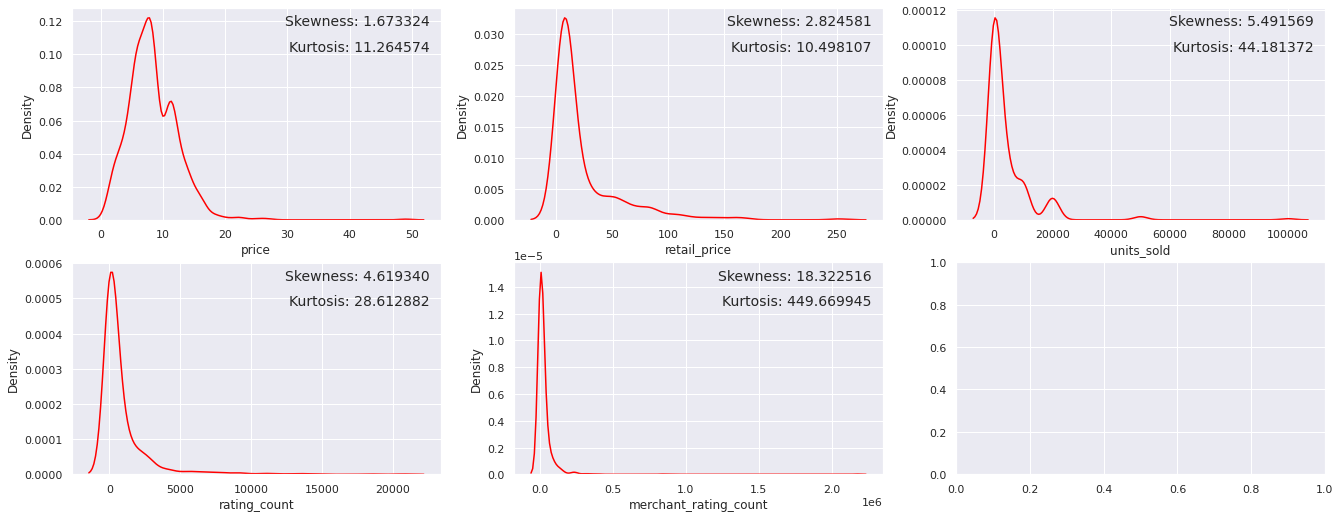

In [412]:
fig, axs = plt.subplots(2,3)
for i, col in enumerate(numerical_cols):
  # sns.histplot(df_nums[col],ax = axs[i//3,i%3])
  sns.kdeplot(df_nums[col],ax = axs[i//3,i%3], color = 'red')
  axs[i//3,i%3].text(x=0.97, y=0.97, transform=axs[i//3,i%3].transAxes, s="Skewness: %f" % df_nums[col].skew(),\
      fontsize=14, verticalalignment='top', horizontalalignment='right')
  axs[i//3,i%3].text(x=0.97, y=0.85, transform=axs[i//3,i%3].transAxes, s="Kurtosis: %f" % df_nums[col].kurt(),\
      fontsize=14, verticalalignment='top', horizontalalignment='right')

plt.show()

In [413]:
# def Decriptive_stats(feature):
#   print(f'\n{feature.name} Description:') 
#   print('-' * 30)
#   print(feature.describe())
#   print(f'{feature.name} Skew: ',feature.skew())
#   print('-' * 50)
#   print(f'{feature.name} kurtosis:', feature.kurt())
#   print('=' * 100)

In [414]:
# for i, col in enumerate(df_nums.columns):
#   Decriptive_stats(df_nums[col])

### **2.4 Handling Categorical Data** 

In [415]:
df2.rating.value_counts()

4.0    751
5.0    156
3.0    131
2.0     12
1.0      2
6.0      1
Name: rating, dtype: int64

In [416]:
df2 = df2.drop(df1[df1.rating == 6].index, axis = 0)
df2.rating.value_counts()

4.0    751
5.0    156
3.0    131
2.0     12
1.0      2
Name: rating, dtype: int64

In [441]:
def rating_values_per_cols(by):
  col = df_cats.groupby(['product_color', 'rating']).agg({'rating':'count'})
  col.rename({'rating':'value'}, axis=1,inplace = True)
  col.insert(0,'rating',col.index.get_level_values(0))
  col.insert(1,by,col.index.get_level_values(1))
  col = col.reset_index(drop = True)
  return col


In [464]:
by = 'product_color'
colors = rating_values_per_cols(by)
df_cats[(df_cats.product_color == 'Black') or (df_cats.product_color == 'black')]#['rating'].value_counts()

ValueError: ignored

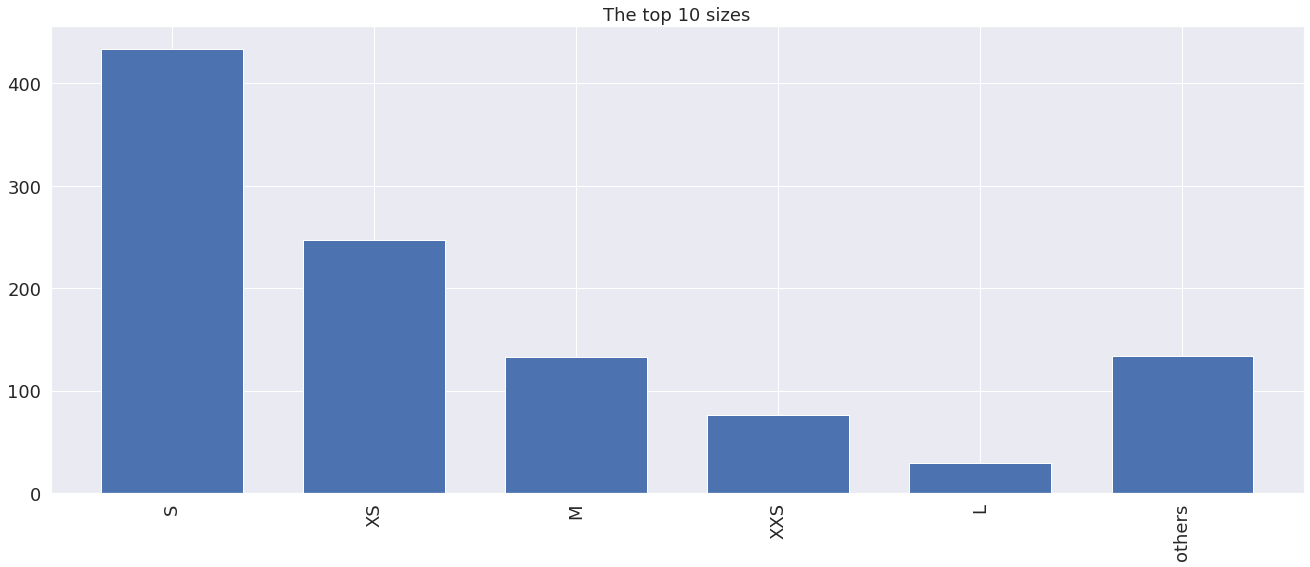

In [389]:
sizes = df_cats['product_variation_size_id'].value_counts(ascending = False)[:5]
sizes['others'] = df_cats['product_variation_size_id'].value_counts(ascending = False)[5:].sum()

sizes.plot.bar(fontsize = 18,width=0.7)
plt.title('The top 10 sizes',fontsize = 18)
plt.show()

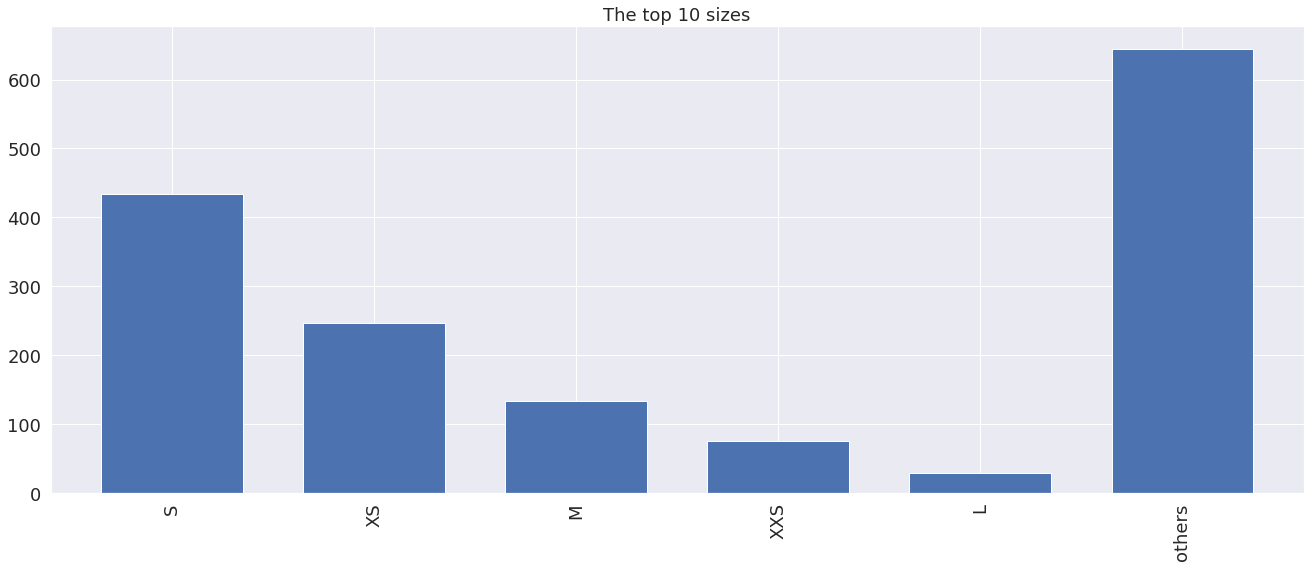

In [390]:
countr = df_cats['countries_shipped_to'].value_counts(ascending = False)[:5]
sizes['others'] = df_cats['countries_shipped_to'].value_counts(ascending = False)[5:].sum()

sizes.plot.bar(fontsize = 18,width=0.7)
plt.title('The top 10 sizes',fontsize = 18)
plt.show()